# Explore here

### PASO 0: IMPORTACIONES

In [224]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

### PASO 1: LEER CSV IMPORTAR DATA

In [225]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS

In [226]:
total_data.shape

(48895, 16)

* INFORMACIÓN DE LAS VARIABLES

In [227]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

La 1ª columna "#" indica el índex de las variables y la 2ª su nombre/indicador.

La 3ª columna cuenta los valores no nulos, es decir dónde sí tenemos data dentro de todo el Data Frame. Casi todos las columnas tienen todos los valores completop pero en el caso de las columnas 12 y 13 vemos que faltan unos 10.000 datos.

La 4ª columna nos dice el tipo de dato que contienen las variables, numéricos o objeto-string. 

Por último tenemos un recuento de los tipo de variable y cuánto ocupa en la memoria el total del df.

* DETECTAR DUPLICADOS

In [228]:
total_data.drop('id', axis = 1).duplicated().sum()

np.int64(0)

Comprobamos la columna 'id' por si tenemos duplicados de datos con la funcion .duplicated() y los sumamos si existen con .sum()

No se encuentran duplicados

In [229]:
total_data["host_name"].duplicated().sum()

np.int64(37442)

In [230]:
total_data["host_id"].duplicated().sum()

np.int64(11438)

Al eliminar la columna identificadora no se encuentran duplicados pero al comprobar si existen otros duplicados creo que es interesante destacar que en host_id tenemos 11438 aunque no influencia al resultado del análisis, simplemente apreciamos que más de un host maneja varios alquileres.

* ELIMINAR INFO IRRELEVANTE

In [231]:
total_data.drop(["id","name","host_name","host_id","last_review","reviews_per_month","number_of_reviews","calculated_host_listings_count","neighbourhood"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,0


#### CONCLUSIÓN DEL PASO 2

Las columnas eliminadas son: "id","name","host_name","host_id","last_review","reviews_per_month","number_of_reviews","calculated_host_listings_count","neighbourhood"


* La columna "id" se elimina para evitar duplicado de data.

* Las siguientes variables ("name", "host_name","host_id) no aportan información relevante para la predicción del análisis porqué es solamente informacion del nomnbre del apartamento e info del propietario.

* Respecto a la info de localización del apartamento, primeramente eliminé las columnas "latitude","longitude" porque pensé que son variables que no aportan información adicional ya que seguimos teniendo información de la localización del apartamento con las columnas "neighbourhood_group" y "neighbourhood" aunque no es tan exacta. Al hacer la primera prueba vi que "neighbourhood" no es posible analizarla bien y decidí probar a no eliminar  "latitude","longitude".

* De las variables que aportan información de las reviews he descartado todas.

Al final me quedo con las siguientes variables para empezar el análisis:

* De las cuales son variables categóricas; "neighbourhood_group" y "room_type"

* Y cómo varibales numéricas; "price", "minimum_nights", "latitude", "longitude", y "availability_365"

### PASO 3: ANÁLISIS DE VARIBALES UNIVARIANTE

### ANÁLISIS UNIVARIANTE DE VAR. CATEGÓRICA

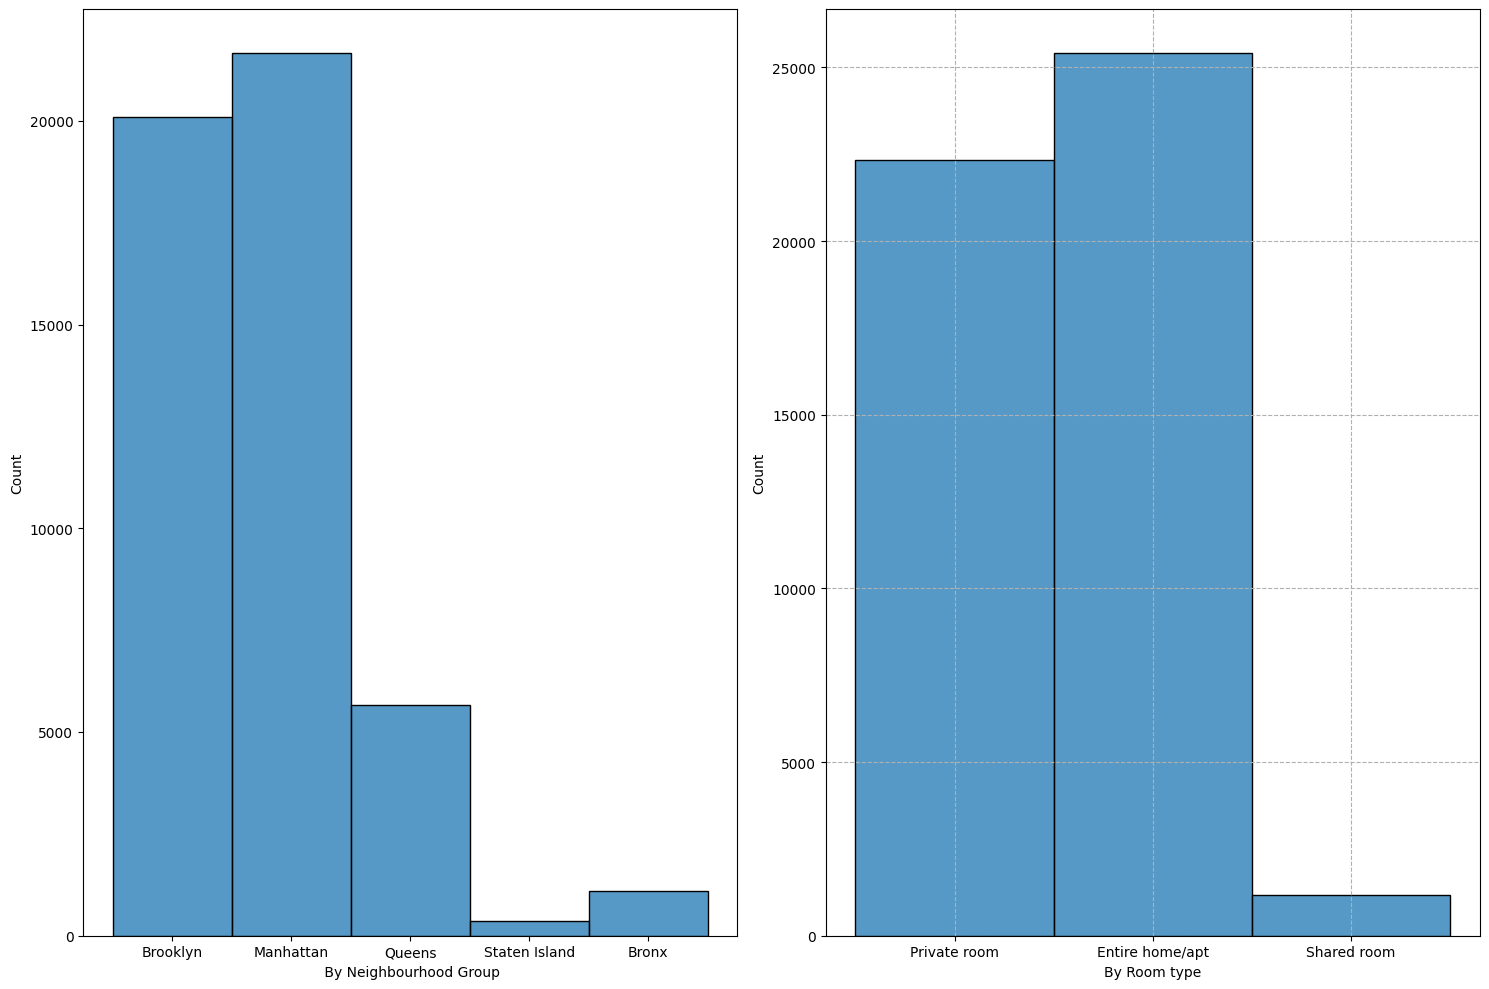

In [232]:
fig, axis = plt.subplots(1,2, figsize = (15, 10))

plot1=sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set(xlabel = " By Neighbourhood Group")

plot3=sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(xlabel = "By Room type")

plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.show()


Comentario: No sé porque solamente aparece la grid en la segunda gráfica

#### CONCLUSIONES DEL ANÁLISIS VAR. UNIVARIABLES CATEGÓRICAS:

* Primera gráfica: El barrio dónde encontramos más apatamentos es Manhattan seguido de Brooklyn y en el que menos con diferencia es Staten Island. Los apartamentos con el alquiler más alto se encuentran en Brooklyn y Manhattan, en cambio los más económicos en Staten Island

* Segunda gráfica: Los laquileres con mayor precio son los de las habitaciones privadas y los alojamientos enteros. Además también podemos apreciar que la mayoria de propiedades publicadas seguramente son casas completas o habitaciones privadas y muy pocas de ellas son habitaciones compartidas por la diferencia de data en las dos gráficas 

### ANÁLISIS UNIVARIANTE DE VAR. NUMÉRICAS: 


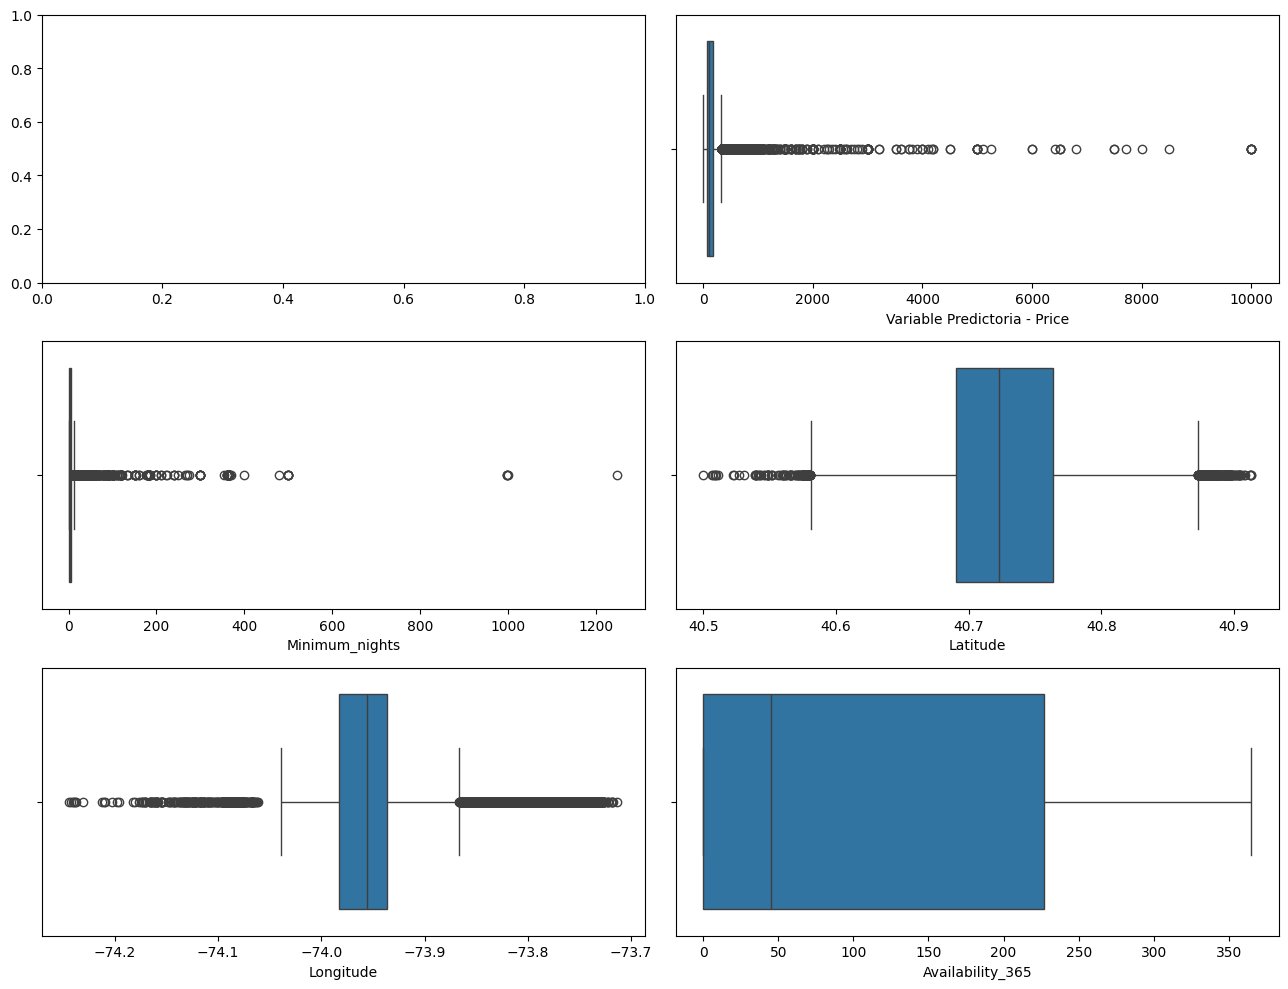

In [233]:
fig, axis = plt.subplots(3, 2, figsize = (13, 10))

sns.boxplot(ax = axis[0, 1], data = total_data, x = "price").set(xlabel = "Variable Predictoria - Price")

sns.boxplot(ax = axis[1, 0], data = total_data, x = "minimum_nights").set(xlabel = "Minimum_nights")

sns.boxplot(ax = axis[1, 1], data = total_data, x = "latitude").set(xlabel = "Latitude")

sns.boxplot(ax = axis[2, 0], data = total_data, x = "longitude").set(xlabel = "Longitude")

sns.boxplot(ax = axis[2, 1], data = total_data, x = "availability_365").set(xlabel = "Availability_365")

plt.tight_layout()

plt.show()

#### CONCLUSIONES DEL ANÁLISIS Vars. NUMÉRICAS(I): 

Inicialmente he representado las variables tanto en histplot como en boxplot y después he elegido cuál es el más representativo visualmente. En este punot del análisis he elegido usar gráficos de caja.

* Price,la mayoría de los precios se encuentran en un rango bajo, con una distribución concentrada cerca del mínimo. Esto indica que la mayoría de los alojamientos tienen precios accesibles aunque también encontramos una gran cantidad de ellos con precios altos.

* Minimum_nights, al encontrar la mayoria de valores en un ranog muy cerca de cero interpretamos que la mayoria de apartamentos tiene poco sdías de estancia mínima

* Latitude y Longitude, están distribuidas de forma consante y sin grandes variaciones ya que tampoco encontramos una gran densidad de datos en alguna parte concrea del gráfico, nos indica que la ubicación geográfica de los alojamientos dentro de un área específica es normal.

* Availability_365 tiene una dispersión amplia, sugiriendo que algunos alojamientos están disponibles todo el año mientras otros solo por períodos cortos

#### VISUALIZACIÓN AMPLIADA DE HISTOGRAMAS Y BARPLOTS

Prueba visual de cómo la representacion de los valores en histogramas no mostraban una gráfica clara para analizar conclusiones rápidas

<Axes: xlabel='minimum_nights'>

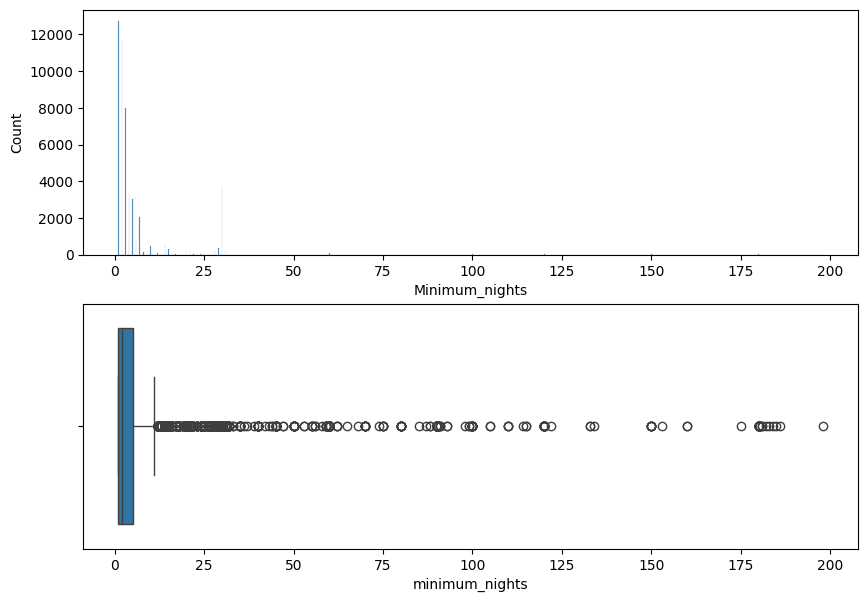

In [234]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights").set(xlabel = "Minimum_nights")
sns.boxplot(ax = axis[1], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights")


[Text(0.5, 0, 'Variable Predictoria - Price')]

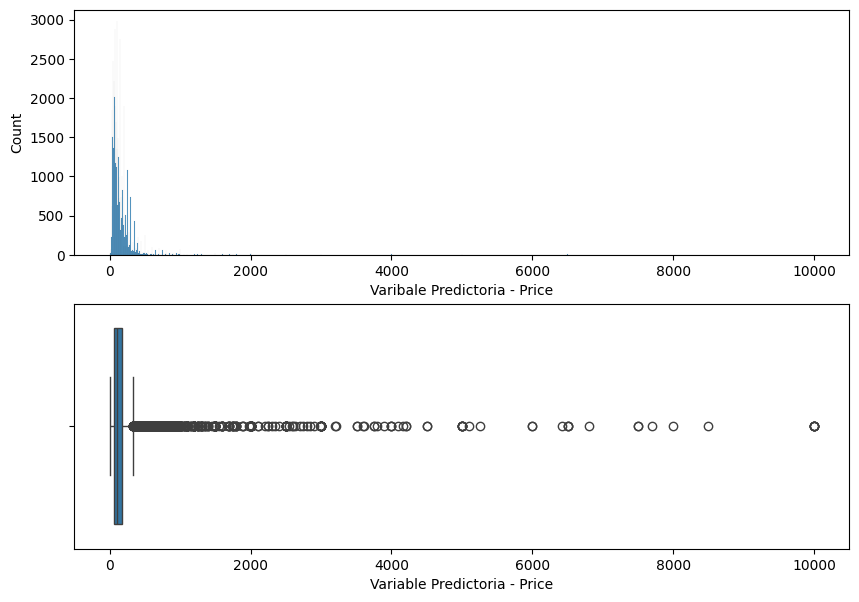

In [235]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data, x = "price").set(xlabel = "Varibale Predictoria - Price")

sns.boxplot(ax = axis[1], data = total_data, x = "price").set(xlabel = "Variable Predictoria - Price")

* ANÁLISIS DE LA VARIBALE AVAILABILITY_365 Y LIMPIEZA DE DATOS 

In [236]:

total_data.loc[(total_data["availability_365"]==0) | (total_data["availability_365"]>365)]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,0
6,Brooklyn,40.68688,-73.95596,Private room,60,45,0
8,Manhattan,40.80178,-73.96723,Private room,79,2,0
14,Manhattan,40.73530,-74.00525,Entire home/apt,120,90,0
20,Brooklyn,40.71842,-73.95718,Entire home/apt,299,3,0
...,...,...,...,...,...,...,...
48550,Queens,40.69919,-73.89902,Private room,45,1,0
48731,Brooklyn,40.66716,-73.98101,Entire home/apt,111,8,0
48756,Manhattan,40.74404,-73.97239,Entire home/apt,129,2,0
48760,Queens,40.74719,-73.91919,Private room,46,1,0


In [237]:
total_data = total_data[total_data["availability_365"] != 0]

Comentario: No entiendo porque no elimina siempre toda la data en availability_365 menor a cero, hay gráficos posteriores en los que me sigue apareciendo algunos apartamenos con cero dias de disponibilidad.

* CONCLUSIÓN DE LA COLUMNA AVAILABILITY_365

Algunos apartamentos figuran con 0 disponibilidad lo que concluyo que debe de ser un error y he decidido eliminar los datos de los apartamentos que tienen disponibilidad 0. 

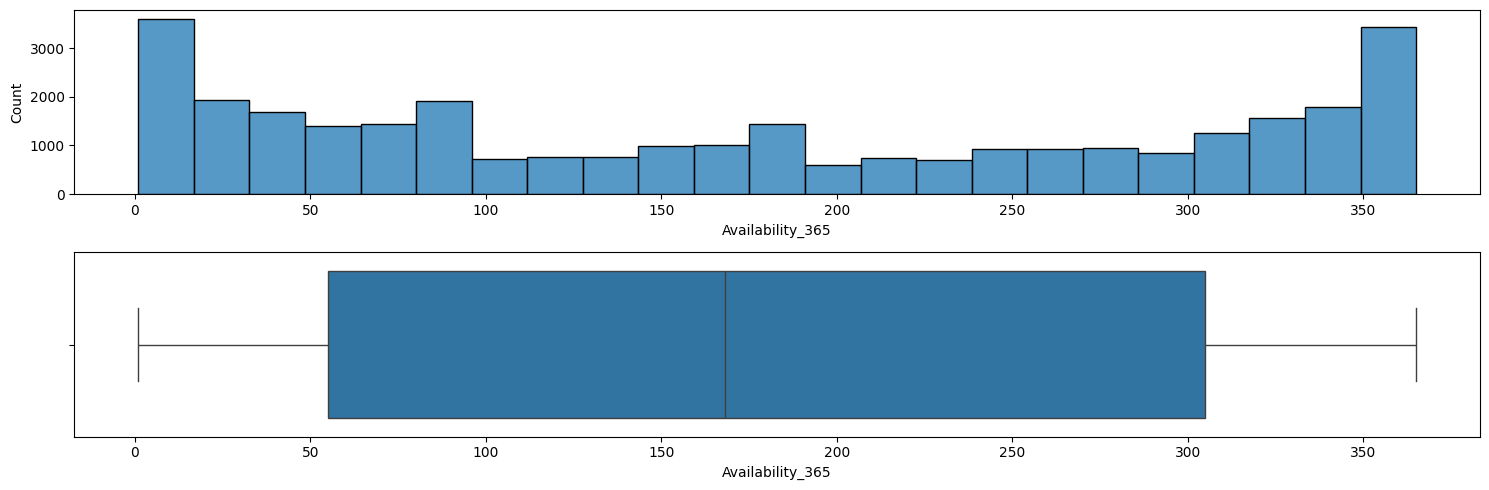

In [238]:
fig, axis = plt.subplots(2,1 , figsize = (15, 5))

sns.histplot(ax = axis[0], data = total_data, x = "availability_365").set(xlabel = "Availability_365")
sns.boxplot(ax = axis[1], data = total_data, x = "availability_365").set(xlabel = "Availability_365")

plt.tight_layout()

plt.show()

### PASO 4: ANÁLISIS DE VARIABLES MULTIVARIANTE

### ANÁLISIS NUMÉRICO - NUMÉRICO

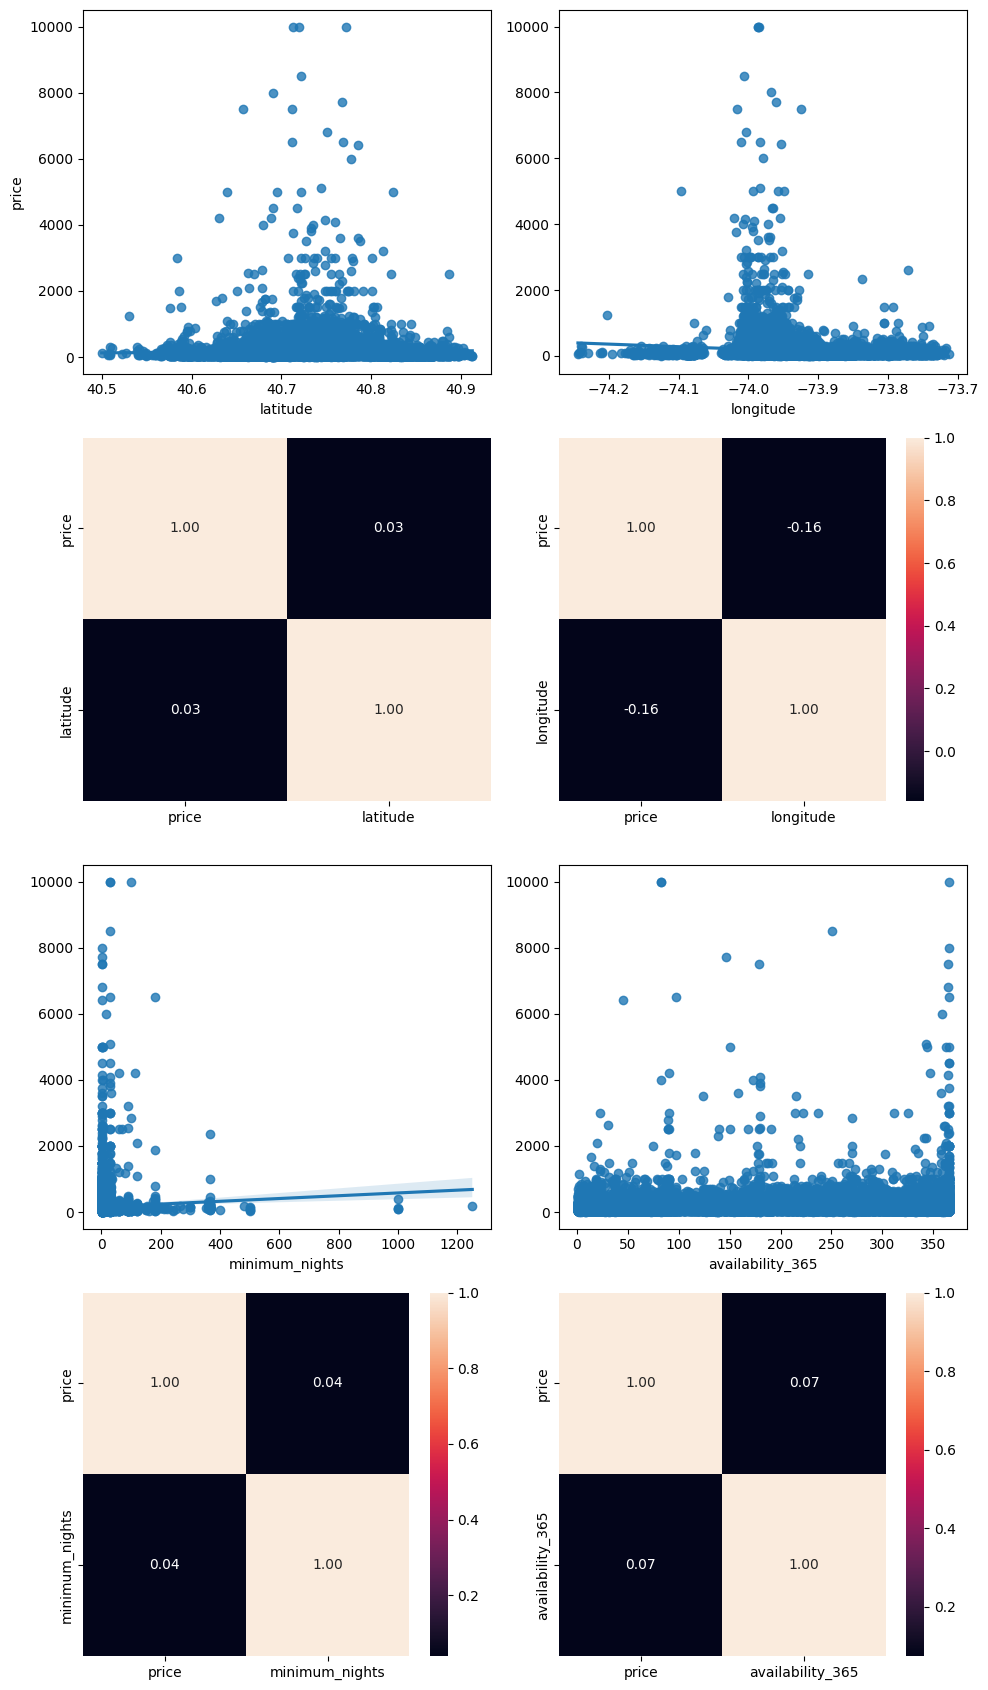

In [239]:
fig, axis = plt.subplots(4, 2, figsize = (10, 17))


sns.regplot(ax = axis[0, 0], data = total_data, x = "latitude", y = "price")
sns.heatmap(total_data[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_data, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])


plt.tight_layout()

plt.show()



Comentario: no entiendo porque la correlacion es negativa pero si hay conclusión de relación positiva entre las variables precio y longitude

#### CONCLUSIONES DEL ANÁLISLIS NUMÉRICO - NUMÉRICO   DKFVBROIGUHRIUGHAIGHAREÑNOVKAÑEROIV

Graficos de dispersión y mapas de calor:

En la primera y segunda fila se encuentras las variables de localización de los apartamentos aportando un rango de ubicación geográfica de Nueva York. El centro de la ciudad oscila entre la latitud 40.7 y la longitud -74.0 

* Latitude, representa la ciudad de norte a sur. La correlación entre precio y latitude es baja ya que el cambio de precio de los apartamentos del centro de la ciudad respecto a su norte y sur no parece variar. Se observan los datos bastante dispersos y menos concentrantrados en el norte de la ciudad 40.5
* Longitude, representa la ciudad de oeste a este. La correlación es más notable en este caso, viusalmente vemos una concentración de datos en el medio de la gráfica que señala el cerco turístico de la ciudad donde se encuentran más puntos concentrados con precios más elevados

* Minimun nights y Availability no aportan datos de valor al análisis ya que la mayoria de los puntos se concentran en cero hay una gran cantidad de outliers y no se relacionan la variable de precio.

### ANÁLISIS CATEGÓRICO-CATEGÓRICO

<Axes: xlabel='room_type', ylabel='count'>

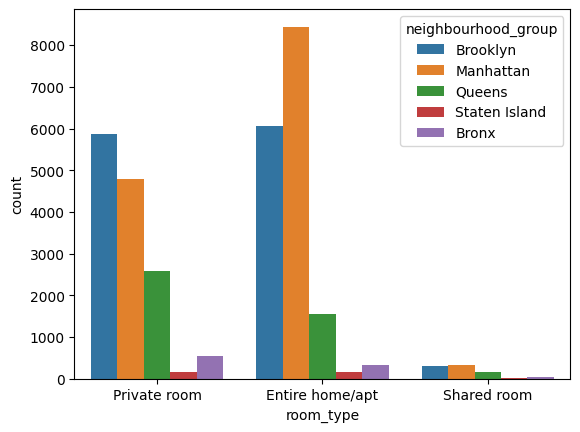

In [240]:
sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")


#### CONCLUSIONES DEL ANÁLISIS CATEGÓRICO-CATEGÓRICO

* En general los barrios dónde encontramos más alojamiento de diferentes tipos son Manhattan y Brooklyn. Vemos que el mayor numero de apartamentos enteros está en Manhattan respecto y Brooklyn tiene el mayor numero de habitaciones privadas, también podemos concluir que estos dos barrios son los más turísticos y dónde más se tiende a alquilar alojamientos. Por otra parte, el tipo de estancia de menor presencia en la ciudad son las habitaciones compartidas

### ANÁLISIS DE CORRELACIONES NUMÉRICO - CATEGÓRICO

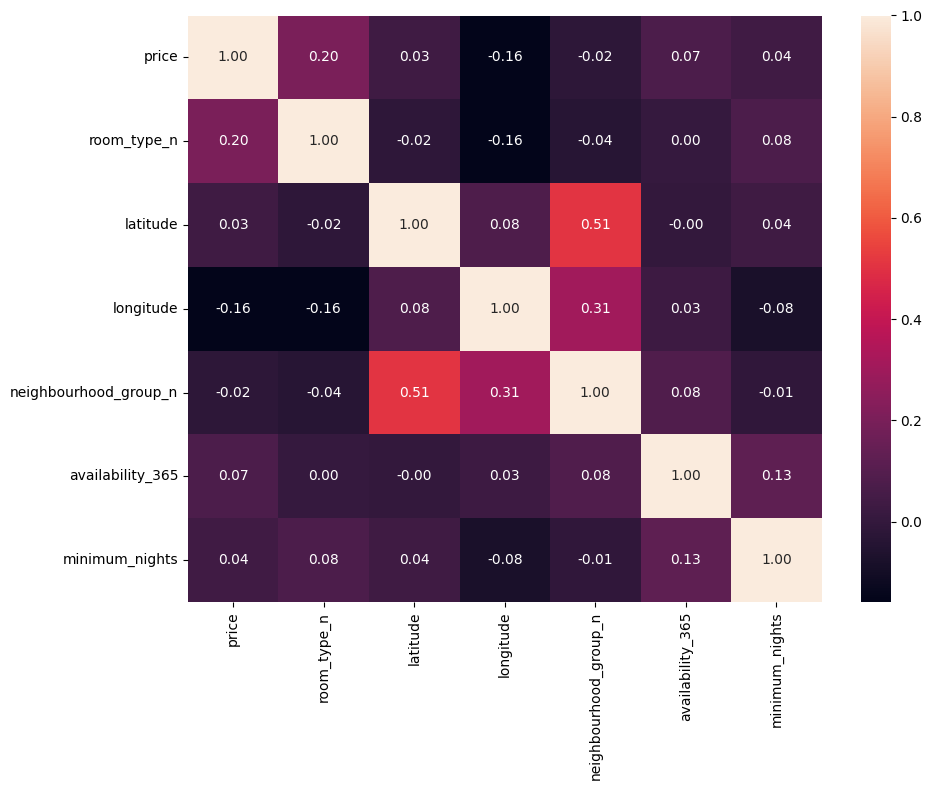

In [241]:

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]

fig, axis = plt.subplots(figsize = (10, 8))

sns.heatmap(total_data[["price","room_type_n", "latitude","longitude","neighbourhood_group_n", "availability_365","minimum_nights"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#### CONCLUSIONES    

Los resultados en general no indican que las variables tengan mucha relación con la predictoria (precio). La que más se acerca es la variable categoria room_type ya que según lo grande o las acomodaciones que ofrezca el precio será más alto o bajo. Las demás variables no tienen prácticamente relación con precio

### PASO 5: INGENIERÍA DE CARACTERÍSTICAS

### ANÁLISIS DE OUTLIERS

* ANÁLISIS DESCRIPTIVO:

In [242]:
total_data.describe()

,latitude,longitude,price,minimum_nights,availability_365,room_type_n,neighbourhood_group_n
count,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,40.728401,-73.948745,162.050475,8.338658,175.831994,0.582265,0.854665
std,0.056561,0.051397,254.425463,23.836703,126.187636,0.546206,0.900764
min,40.499790,-74.244420,0.000000,1.000000,1.000000,0.000000,0.000000
25%,40.688383,-73.983270,70.000000,2.000000,55.000000,0.000000,0.000000
50%,40.723720,-73.954110,111.500000,3.000000,168.000000,1.000000,1.000000
75%,40.763030,-73.930132,189.000000,5.000000,305.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,365.000000,2.000000,4.000000


#### CONCLUSIONES DE LA TABLA DESCRIPTIVA

* Ubicación: latitude y longitude
Mean,  40.72 y -73.94 Como indicaba anteriormente, las coordenadas de latitude y longitude nos indican la posicion de los apartamentos que se encuentran en Nueva York. El reusltado estadístico nos indica que la mayoria de apartamentos están en esa ciudad.

Std (desviación estándar): El resultaod muestra un valor bajo en ambas lo que indica que no hay mucha dispersión en la localización de los apartamentos y probablemente la mayoria esten concentrados en un punto de la ciudad.ç

Miiny max: Indican los límites geográficos del dataset.
    
    Conclusión: No hay grandes variaciones en la ubicación.

* Price:

Mean, 162$ será el precio medio de un alojamiento

Std, 254$ se aleja casi 100$ del promedio así que vemos que los precios pueden variar bastante.

Min: Algunos apartamentos tiene precio marcado en 0$ seguramente es un error.

Max: El apartamento o apartamentos más caros cuestan 10,000$, necesitariamos analizar más en profundidas para ver si se trata de un error o un valor significativo para el modelo ya que la ciudad es costosa y puede tener varios alojamientos de lujo con costes elevados.

Percentiles:

25% → 70$ rango de precio estimado más bajo

50% → 111.5$ es el precio medio del coste de un alquiler vacacional en Nueva York

75% → 189$ rango de precio estimado más alto

    Conclusión: Con los rangos intercuartiles y el max vemos que los precios en general oscilan entre 70$ y 189$ aunque también tenemos algunos alquileres en los puntos extremos (outliers)

* Minimum_nights:
Mean, el promedio de la estancia mínima es de 8 noches.

Std, 23.83 → La dispersión en este caso es bastante más elevada, lo que indica que que hay alojamientos que tienen estancias mínimas muy largas y esto podría ser señal de valores atipicos que aportan ruido al análisis y posteriormente al modelo de entrenamiento.

Mmin, el mínimo de noches para alquilar es 1 en algunos alojamientos.

Max: algunos apartamentos se pueden alquilar por 1250 noches?¿, no son valores lóigcos ni reales.

Percentiles: 

25% , el minimo está en 2 noches

50% , 3 noches es el promedio de alquiler de las estancias

75% , 5 noches suele ser el máximo de las estancias

    Conclusión: Aunque el promedio es 8, la mayoría de los alquileres son de 2 y 5 noches.

* Availability_365:

Mean, el promedio de disponibilidad en los alojamientos es de la mitad de los días del año.

Std, Hay mucha variabilidad en los días disponibles

Min, Algunos alojamientos están disponibles solo 1 día.

Max, Algunos están disponibles todo el año.
    
    Conclusión: Algunos alojamientos están siempre disponibles, otros durante la mitad del año y algunos tienen una disponibilidad muy baja sugiriendo presencia de muchos outliers.

* Room_type_n: No entiendo que representan los valores

* Neighbourhood_group_n:

Min y Max, de 0 a 4 representa 5 grupos de barrios.


* REPRESENTACIÓN DE GRÁFICOS

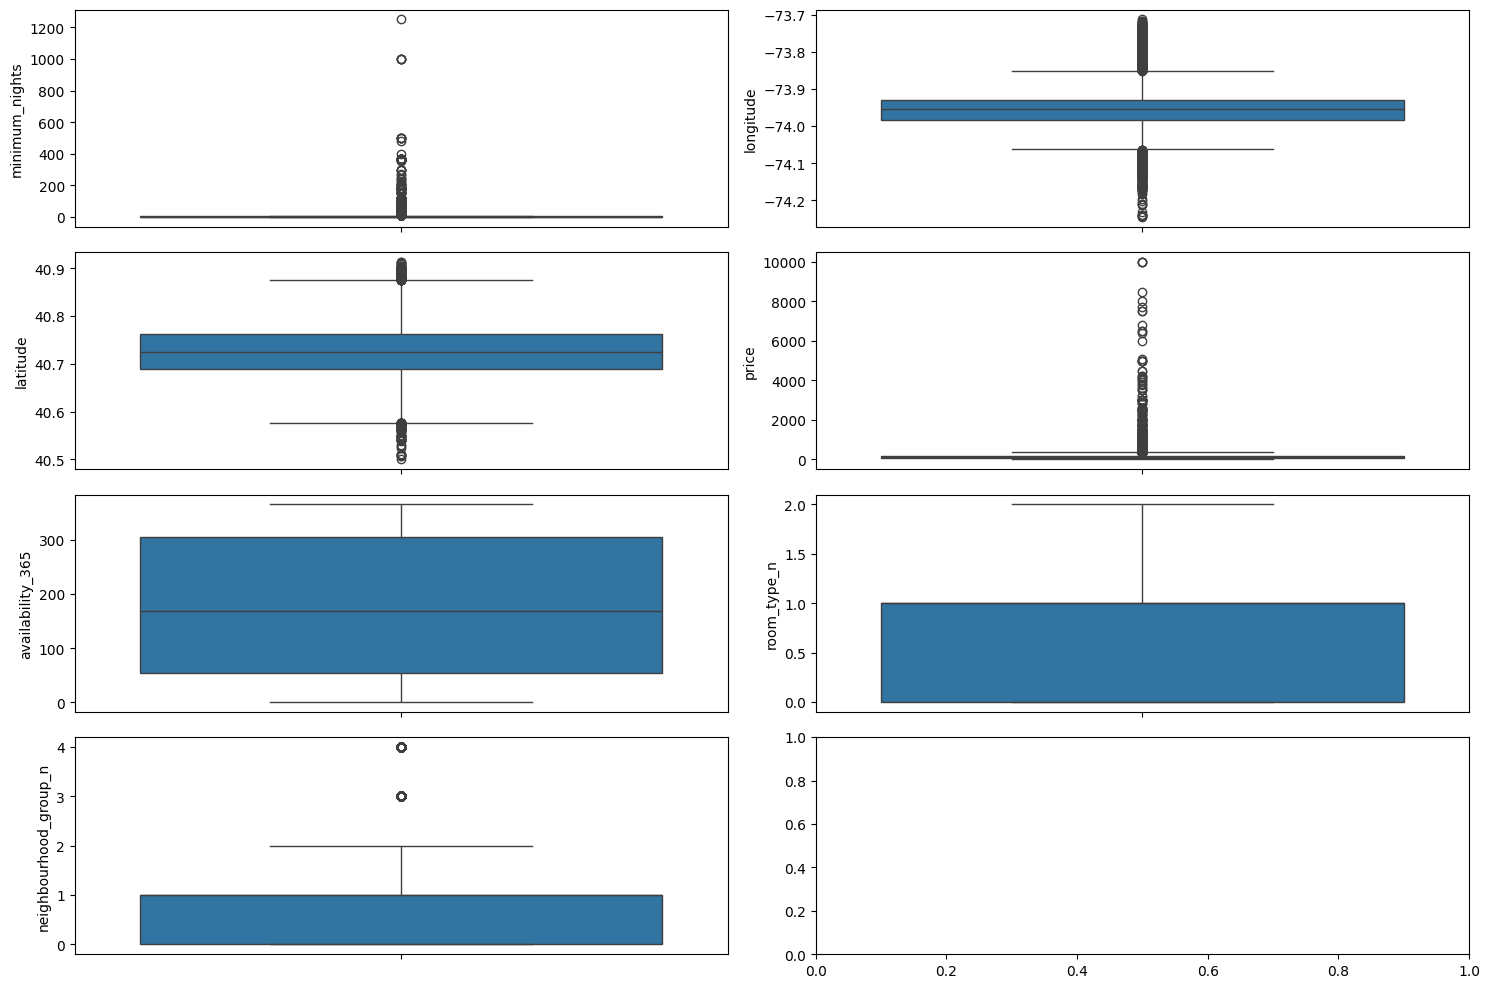

In [243]:
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "latitude")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "price")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "room_type_n")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "neighbourhood_group_n")


plt.tight_layout()

plt.show()

#### CONCLUSIONES SKDFUYVBEULVBSJ

* BÚSQUEDA Y ANÁLISIS DE OUTLIERS

Las variables afectadas considerablemente por los outliers son: price, minimum nights y availability

In [244]:
total_data[total_data["price"] > 5000]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365,room_type_n,neighbourhood_group_n
3537,Manhattan,40.77782,-73.97848,Entire home/apt,6000,14,359,1,1
4377,Brooklyn,40.69137,-73.96723,Entire home/apt,8000,1,365,1,0
12342,Manhattan,40.71355,-73.98507,Private room,9999,99,83,0,1
29238,Manhattan,40.77213,-73.98665,Entire home/apt,10000,30,83,1,1
29662,Manhattan,40.76824,-73.95989,Entire home/apt,7703,1,146,1,1
29664,Manhattan,40.78517,-73.95270,Entire home/apt,6419,1,45,1,1
30268,Manhattan,40.72197,-74.00633,Entire home/apt,8500,30,251,1,1
37194,Manhattan,40.76835,-73.98367,Private room,6500,30,97,0,1
40433,Manhattan,40.71980,-73.98566,Entire home/apt,9999,30,365,1,1
42523,Manhattan,40.71162,-74.01693,Entire home/apt,7500,1,364,1,1


In [245]:
total_data[total_data["minimum_nights"] >5]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365,room_type_n,neighbourhood_group_n
19,Manhattan,40.79685,-73.94872,Entire home/apt,190,7,249,1,1
27,Manhattan,40.76715,-73.98533,Entire home/apt,150,10,75,1,1
29,Manhattan,40.72920,-73.98542,Entire home/apt,180,14,67,1,1
36,Brooklyn,40.68876,-73.94312,Private room,35,60,365,0,0
42,Brooklyn,40.69673,-73.97584,Private room,120,7,311,0,0
...,...,...,...,...,...,...,...,...,...
48882,Brooklyn,40.69652,-73.91079,Private room,40,20,31,0,0
48884,Brooklyn,40.71790,-73.96238,Private room,190,7,341,0,0
48886,Manhattan,40.75561,-73.96723,Entire home/apt,200,6,176,1,1
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,27,1,1


In [246]:
total_data[total_data["availability_365"]== 0]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365,room_type_n,neighbourhood_group_n


En el caso de la variable availability ya hemos visto y analizado previamente que esos datos no tenían sentido y los había eliminado. Ahora se comprueba que sí ha funcionado la ejecución.

* ELIMINAR OUTLIERS

In [247]:
availability_stats = total_data["availabliity_365"].describe()

are_iqr = availability_stats["75%"] - availability_stats["25%"]
upper_limit = availability_stats["75%"] + 1.5 * are_iqr
lower_limit = availability_stats["25%"] - 1.5 * are_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(are_iqr, 2)}")

total_data[total_data["availability_365"] > 15]

KeyError: 'availabliity_365'

In [ ]:
price_stats = total_data["price"].describe()

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")



Los límites superior e inferior para la búsqueda de outliers son 367.5 y -108.5, con un rango intercuartílico de 119.0


In [ ]:
total_data=total_data[total_data["price"] < 500 ]

AttributeError: 'DataFrame' object has no attribute 'show'

#### CONCLUSIONES ELIMINACIÓN DE OUTLIERS
- Prueba availability,
- Eliminación precios >500,
-ANALIZAR TODAS LAS VARIABLES

### ANÁLISIS DE VALORES FALTANTES

In [ ]:
total_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group      0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
availability_365         0
room_type_n              0
neighbourhood_group_n    0
dtype: int64

#### CONCLUSIÓN:
No hay valores faltantes

* INTERFERENCIA DE NUEVAS CARACTERISTICAS:

He relacionado las tres variables que aoprtan información con la localizacion de los apartamentos pero no entiedno que es el resultado.

In [ ]:
total_data["LOCATION"] = total_data["latitude"] + total_data["longitude"] + total_data["neighbourhood_group_n"]

total_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365,room_type_n,neighbourhood_group_n,LOCATION
0,Brooklyn,40.64749,-73.97237,Private room,149,1,365,0,0,-33.32488
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,355,1,1,-33.23015
2,Manhattan,40.80902,-73.94190,Private room,150,3,365,0,1,-33.13288
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,194,1,0,-33.27462
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,129,1,1,-33.22733


#### ESCALADO DE VALORES 

In [ ]:
num_variables = ["LOCATION", "room_type_n", "minimum_nights", "price","availability_365"]

X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,room_type_n,minimum_nights,longitude,latitude,availability_365
3619,1,1,30,-73.98376,40.76252,339
37159,0,0,7,-73.91494,40.69807,89
48633,4,0,2,-73.84811,40.81709,177
2479,1,1,14,-73.99168,40.74119,5
21505,0,0,3,-73.99315,40.68148,67


In [ ]:
num_variables = ["LOCATION", "room_type_n", "minimum_nights", "price","availability_365"]

X = total_data.drop("LOCATION", axis = 1)[num_variables]
y = total_data["LOCATION"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

KeyError: "['LOCATION'] not in index"

In [ ]:
num_variables = ["LOCATION", "room_type_n", "minimum_nights", "price","availability_365"]

X = total_data.drop("room_type_n", axis = 1)[num_variables]
y = total_data["room_type_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

KeyError: "['room_type_n'] not in index"

In [ ]:
num_variables = ["LOCATION", "room_type_n", "minimum_nights", "price","availability_365"]

X = total_data.drop("minimum_nights", axis = 1)[num_variables]
y = total_data["minimum_nights"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

KeyError: "['LOCATION', 'minimum_nights'] not in index"

In [ ]:
num_variables = ["LOCATION", "room_type_n", "minimum_nights", "price","availability_365"]

X = total_data.drop("availability_365", axis = 1)[num_variables]
y = total_data["availability_365"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

NameError: name 'num_variables' is not defined

### NORMALIZACION 

¿Porque nunca utilizamos la var objetivo en este paso?

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group_n,room_type_n,minimum_nights,longitude,latitude,availability_365
3619,0.163352,0.776232,0.863941,-0.697233,0.603214,1.316281
37159,-0.937067,-1.048360,-0.055198,0.643765,-0.530141,-0.669911
48633,3.464609,-1.048360,-0.255011,1.945987,1.562829,0.029229
2479,0.163352,0.776232,0.224540,-0.851559,0.228125,-1.337271
21505,-0.937067,-1.048360,-0.215049,-0.880203,-0.821877,-0.844696


### ESCALADO MÍNIMO -MÁXIMO

Solo se utilizan variables numéricas

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group_n,room_type_n,minimum_nights,longitude,latitude,availability_365
3619,0.25,0.5,0.023219,0.488978,0.630922,0.928571
37159,0.00,0.0,0.004804,0.618862,0.472150,0.241758
48633,1.00,0.0,0.000801,0.744989,0.765354,0.483516
2479,0.25,0.5,0.010408,0.474031,0.578376,0.010989
21505,0.00,0.0,0.001601,0.471257,0.431281,0.181319


### PASO 6: SELECCION DE CARACTERÍSTICAS

In [ ]:
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()


NameError: name 'X_train_scal' is not defined

In [ ]:
X_test_sel.head()

NameError: name 'X_test_scal' is not defined

In [ ]:
X_train_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_test.csv", index=False)